In [1]:
import numpy as np
import matplotlib.pyplot as plt
import algorithms as a
import force_functions as f

%config Completer.use_jedi = False

In [2]:
r1_0 = np.array([1./3., 0., 0.], dtype=np.float32)
r2_0 = -r1_0
p1_0 = np.array([-6./7., 3./7., -2./7.], dtype=np.float32)
p2_0 = -p1_0

In [3]:
t_sim = 10
dt = 1e-2

In [4]:
r1_dumb, r2_dumb, p1_dumb, p2_dumb, t_dumb = a.velocity_verlet(r1_0, r2_0, 
                                                               p1_0, p2_0, 
                                                               t_sim, dt, 
                                                               f.dumbbell_force)

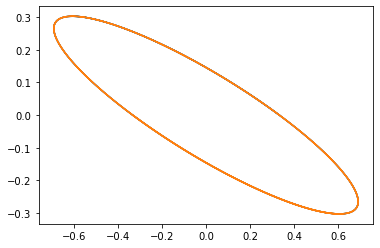

In [5]:
plt.plot(r1_dumb[:,0], r1_dumb[:,1])
plt.plot(r2_dumb[:,0], r2_dumb[:,1])

In [6]:
r1_0 = np.array([1./3., 0., 0.], dtype=np.float32)
r2_0 = -r1_0
p1_0 = np.array([-6./7., 3./7., -2./7.], dtype=np.float32)
p2_0 = -p1_0

In [7]:
r1_FENE, r2_FENE, p1_FENE, p2_FENE, t_FENE = a.velocity_verlet(r1_0, r2_0, p1_0, p2_0, t_sim, dt, f.FENE_force)

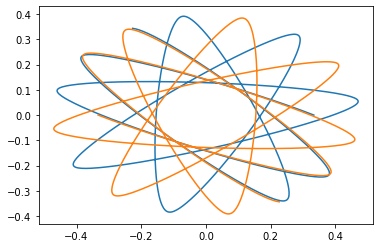

In [8]:
plt.plot(r1_FENE[:,0], r1_FENE[:,1])
plt.plot(r2_FENE[:,0], r2_FENE[:,1])

In [7]:
def calc_energy(r1, r2, p1, p2, pot):
    
    T = np.linalg.norm(p1, axis=1)**2 / 2. + np.linalg.norm(p2, axis=1)**2 / 2.
    
    if pot=='dumbbell':
        V = np.linalg.norm(r1-r2, axis=1)**2 / 2.
    elif pot=='FENE':
        V = -np.log(1 - np.linalg.norm(r1-r2, axis=1)**2) / 2.
        
    return T + V

In [53]:
t_sim = 10
# l = 0.1931833275037836
# l = 1/3.
l = 0
# l = 1/2.
K = [1, 2, 3, 4, 5]

DEV_dumb = []
DEV_FENE = []
Dt = []
for k in K:
    r1_0 = np.array([1./3., 0., 0.], dtype=np.float32)
    r2_0 = -r1_0
    p1_0 = np.array([-6./7., 3./7., -2./7.], dtype=np.float32)
    p2_0 = -p1_0
    
    dt = 4**(-k)
    
    r1_dumb, r2_dumb, p1_dumb, p2_dumb, t_dumb = a.velocity_verlet_BABAB(r1_0, r2_0, p1_0, p2_0, t_sim, dt, 
                                                                         f.dumbbell_force, l)
    
    E_dumb = calc_energy(r1_dumb, r2_dumb, p1_dumb, p2_dumb, pot='dumbbell')
    DE_dumb = E_dumb - E_dumb[0]
    DEV_dumb.append(DE_dumb)
    
    
    r1_0 = np.array([1./3., 0., 0.], dtype=np.float32)
    r2_0 = -r1_0
    p1_0 = np.array([-6./7., 3./7., -2./7.], dtype=np.float32)
    p2_0 = -p1_0
    
    r1_FENE, r2_FENE, p1_FENE, p2_FENE, t_FENE = a.velocity_verlet_BABAB(r1_0, r2_0, p1_0, p2_0, t_sim, dt,
                                                                         f.FENE_force, l)
    
    E_FENE = calc_energy(r1_FENE, r2_FENE, p1_FENE, p2_FENE, pot='FENE')
    DE_FENE = E_FENE - E_FENE[0]
    DEV_FENE.append(DE_FENE)
    
    Dt.append(dt)
    

<ipython-input-7-a555700f02ce>:8: RuntimeWarning: invalid value encountered in log
  V = -np.log(1 - np.linalg.norm(r1-r2, axis=1)**2) / 2.


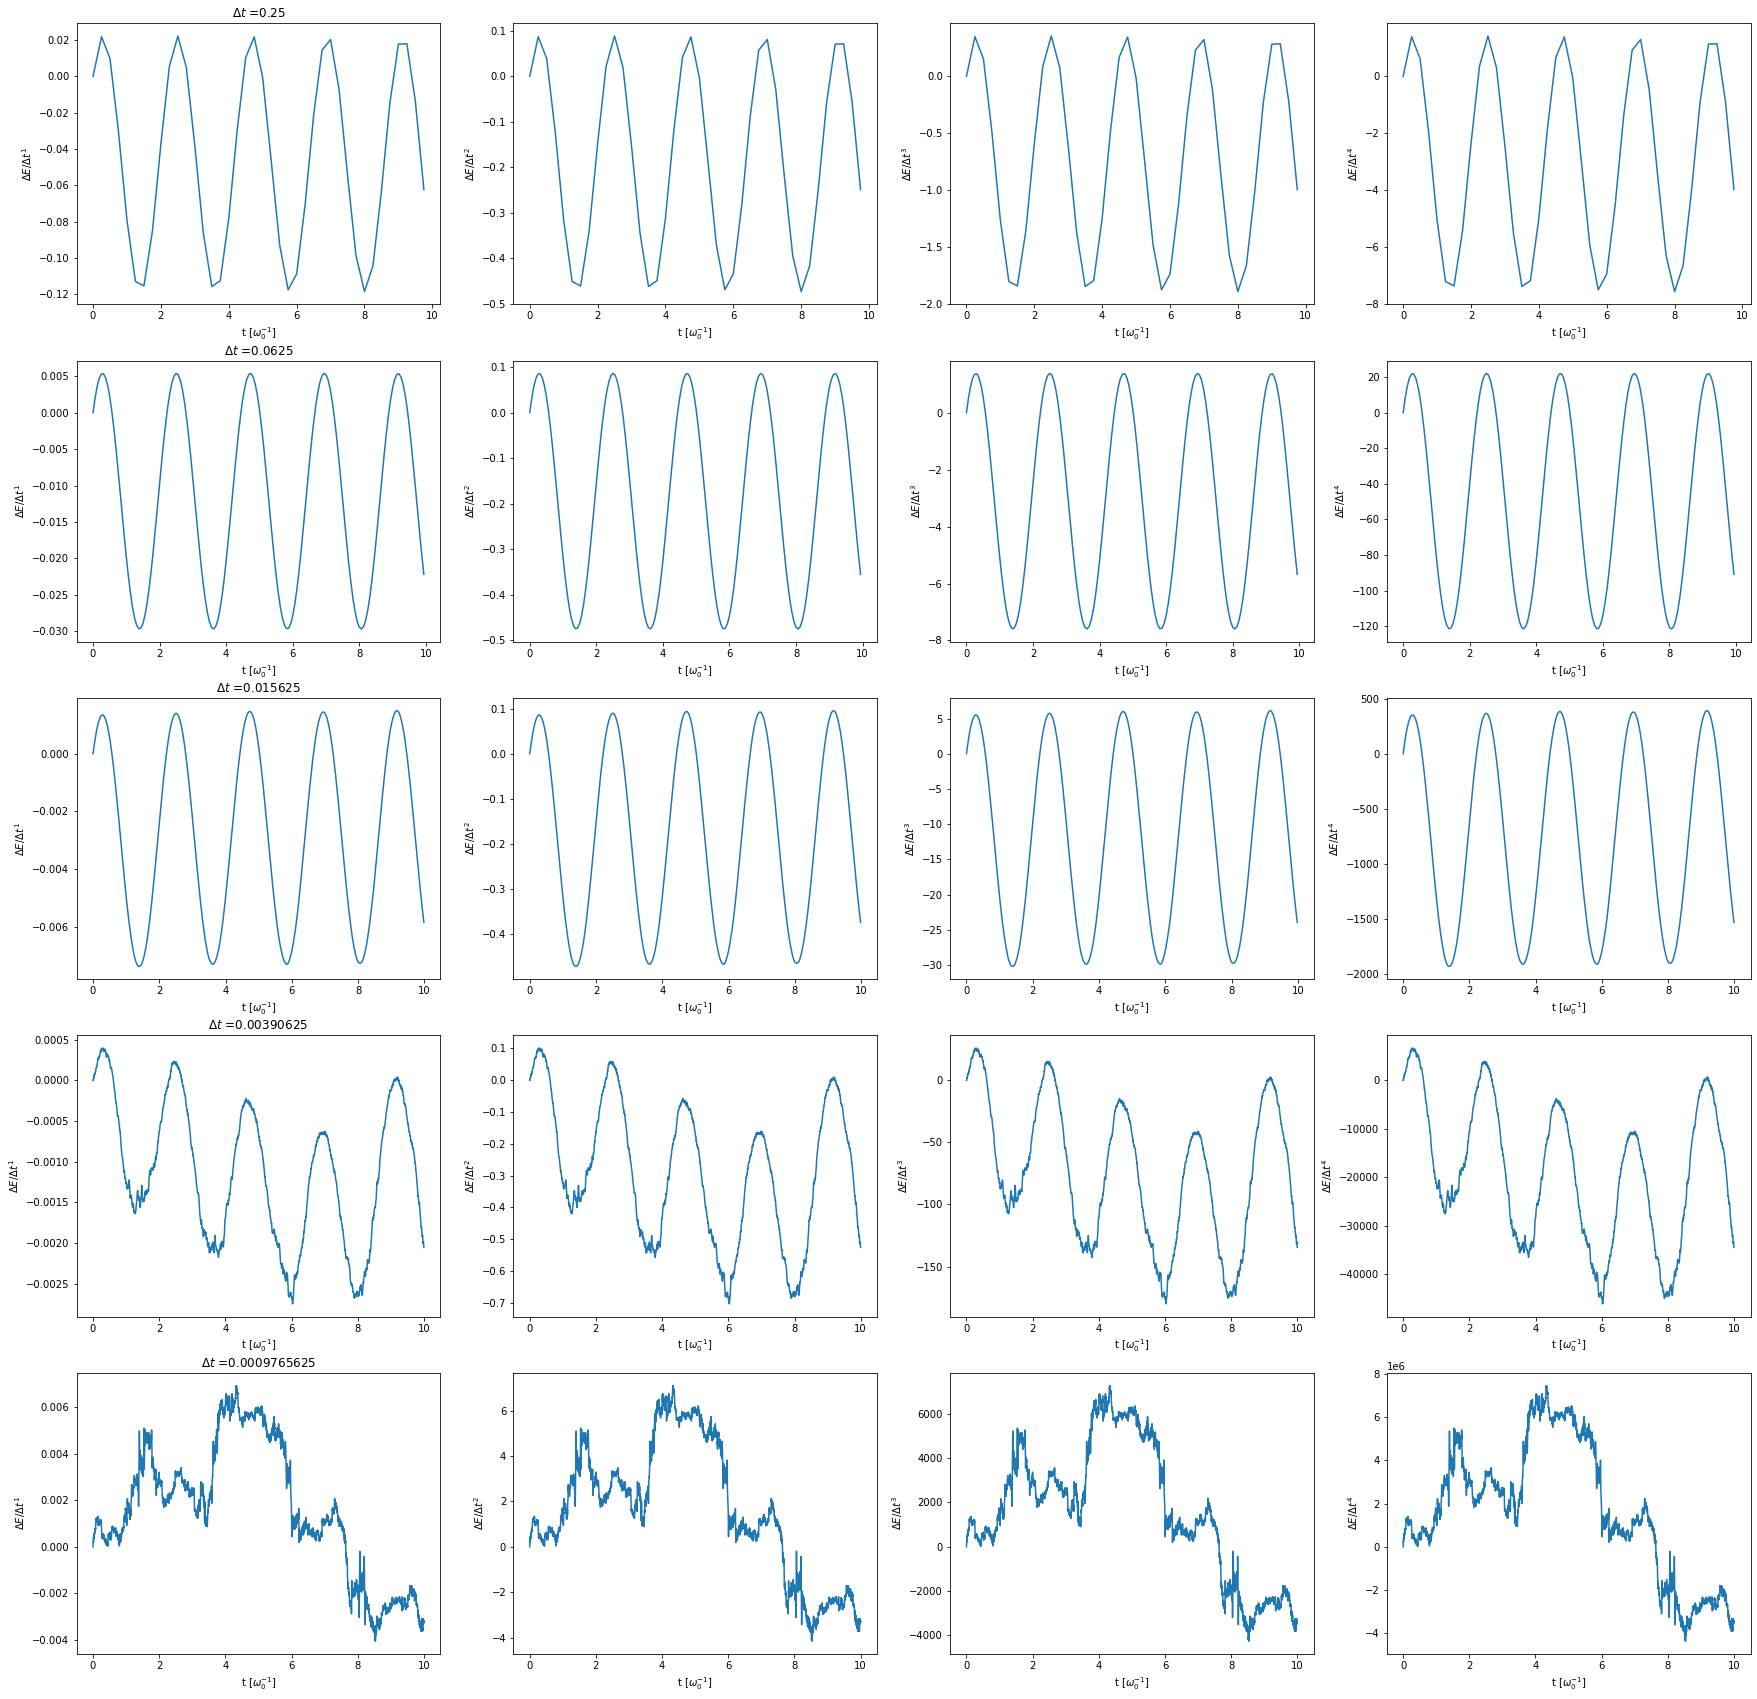

In [54]:
fig, axes = plt.subplots(5, 4, figsize=(30,30))
i = 0
for DE, dt in zip(DEV_dumb, Dt):
    DE_1 = DE / dt**1
    DE_2 = DE / dt**2
    DE_3 = DE / dt**3
    DE_4 = DE / dt**4
    
    t = np.arange(0, 10, dt)
    
    axes[i,0].plot(t, DE_1)
    axes[i,0].set_xlabel(r't $[\omega_0^{-1}]$')
    axes[i,0].set_ylabel(r'$\Delta E / \Delta t^{1}$')
    axes[i,0].set_title(r'$\Delta t$ =' + f'{dt}')
    
    axes[i,1].plot(t, DE_2)
    axes[i,1].set_xlabel(r't $[\omega_0^{-1}]$')
    axes[i,1].set_ylabel(r'$\Delta E / \Delta t^{2}$')
    
    axes[i,2].plot(t, DE_3)
    axes[i,2].set_xlabel(r't $[\omega_0^{-1}]$')
    axes[i,2].set_ylabel(r'$\Delta E / \Delta t^{3}$')
    
    axes[i,3].plot(t, DE_4)
    axes[i,3].set_xlabel(r't $[\omega_0^{-1}]$')
    axes[i,3].set_ylabel(r'$\Delta E / \Delta t^{4}$')
    
    i += 1
    
#plt.savefig('./figures_2/BABAB_lambda{:.4f}.png'.format(l), dpi=300, bbox_inches='tight')